In [1]:
library(ggplot2)
library(reshape2)
library(RColorBrewer)
suppressMessages(library(plyr))
suppressMessages(library(dplyr))
library(stringr)
suppressMessages(library(tidyr))
theme_set(theme_bw())
library(parallel)
library(scales)
library(knitr)
library(IRdisplay)
suppressMessages(library(Biostrings))
options(repr.plot.width=7, repr.plot.height=4)
isotypes = c('Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Gln', 'Glu', 'Gly', 'His', 'Ile', 'iMet', 'Leu', 'Lys', 'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val')

# includes all paired including 3d
#paired_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8.14'='*8:14', 'X9.23'='*9:23', 'X10.25'='10:25', 'X10.45'='*10:45', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X15.48'='*15:48','X18.55'='*18:55', 'X19.56'='*19:56', 'X22.46'='*22:46', 'X26.44'='*26:44', 'X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54.58'='*54:58')
# filtered version of paired positions
paired_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8.14'='*8:14', 'X10.25'='10:25', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X15.48'='*15:48','X18.55'='*18:55', 'X19.56'='*19:56', 'X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54.58'='*54:58')
paired_identities = c('GC', 'AU', 'UA', 'CG', 'GU', 'UG', 'PurinePyrimidine', 'PyrimidinePurine', 'StrongPair', 'WeakPair', 'AminoKeto', 'KetoAmino', 'Wobble', 'Paired', 'Bulge', 'Mismatched', 'Absent')

single_positions = c('X8'='8', 'X9'='9', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X17b'='17b', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X26'='26', 'X32'='32', 'X33'='33', 'X34'='34', 'X35'='35', 'X36'='36', 'X37'='37', 'X38'='38', 'X44'='44', 'X45'='45', 'X46'='46', 'X47'='47', 'X48'='48', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X73'='73')
single_identities = c('A', 'C', 'G', 'U', 'Purine', 'Pyrimidine', 'Weak', 'Strong', 'Amino', 'Keto', 'B', 'D', 'H', 'V', 'Absent')

colors = c('A'='gray20', 'C'='gray20', 'G'='gray20', 'U'='gray20', 'Absent'='gray20', 'Purine'='gray20', 'Pyrimidine'='gray20', 'Weak'='gray20', 'Strong'='gray20', 'Amino'='gray20', 'Keto'='gray20', 'B'='gray50', 'D'='gray50', 'H'='gray50', 'V'='gray50', 'GC'='gray20', 'AU'='gray20', 'UA'='gray20', 'CG'='gray20', 'GU'='gray20', 'UG'='gray20', 'PurinePyrimidine'='gray20', 'PyrimidinePurine'='gray20', 'StrongPair'='gray20', 'WeakPair'='gray20', 'AminoKeto'='gray20', 'KetoAmino'='gray20', 'Wobble'='gray20', 'Paired'='gray20', 'Bulge'='gray20', 'Mismatched'='gray20')
fills = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8', 'Purine'='#ff8300', 'Pyrimidine'='#66c2a5', 'Weak'='#b3de69', 'Strong'='#fb72b2', 'Amino'='#c1764a', 'Keto'='#b26cbd', 'B'='#e5c494', 'D'='#ccebd5', 'H'='#ffa79d', 'V'='#a6cdea', 'Absent'='gray60', 'Mismatched'='gray30', 'Paired'='#ffffcc')

# simple codes for reviewer #3
simple_identities = c('A' = 'A', 'C' = 'C', 'G' = 'G', 'U' = 'U', 'Purine' = 'Purine', 'Pyrimidine' = 'Pyrimidine', 
                      'Weak' = 'A/U (W) ', 'Strong' = 'G/C (S) ', 'Amino' = 'A/C (M) ', 'Keto' = 'G/U (K) ', 
                      'B' = 'C/G/U (B) ', 'D' = 'A/G/U (D) ', 'H' = 'A/C/U (H) ', 'V' = 'A/C/G (V) ', 'Absent' = 'Absent')
colors = c(colors, 'A/U (W) ' = 'gray20', 'G/C (S) ' = 'gray20', 'A/C (M) ' ='gray20', 'G/U (K) ' = 'gray20', 'C/G/U (B) ' = 'gray50', 'A/G/U (D) ' = 'gray50', 'A/C/U (H) ' = 'gray50', 'A/C/G (V) ' = 'gray50')
fills = c(fills, 'A/U (W) ' = '#b3de69', 'G/C (S) ' = '#fb72b2', 'A/C (M) ' ='#c1764a', 'G/U (K) ' = '#b26cbd', 'C/G/U (B) ' = '#e5c494', 'A/G/U (D) ' = '#ccebd5', 'A/C/U (H) ' = '#ffa79d', 'A/C/G (V) ' = '#a6cdea')

Warning message:
“multiple methods tables found for ‘which.max’”Warning message:
“multiple methods tables found for ‘which.min’”Warning message:
“multiple methods tables found for ‘which’”Warning message:
“replacing previous import ‘BiocGenerics::which’ by ‘IRanges::which’ when loading ‘XVector’”Warning message:
“replacing previous import ‘BiocGenerics::which.min’ by ‘IRanges::which.min’ when loading ‘XVector’”Warning message:
“replacing previous import ‘BiocGenerics::which.max’ by ‘IRanges::which.max’ when loading ‘XVector’”Warning message:
“replacing previous import ‘BiocGenerics::which’ by ‘IRanges::which’ when loading ‘Biostrings’”Warning message:
“replacing previous import ‘BiocGenerics::which.min’ by ‘IRanges::which.min’ when loading ‘Biostrings’”Warning message:
“replacing previous import ‘BiocGenerics::which.max’ by ‘IRanges::which.max’ when loading ‘Biostrings’”

In [2]:
identities = read.delim('identities.tsv', sep='\t')
identities$quality = as.logical(identities$quality)
identities$restrict = as.logical(identities$restrict)
identities = identities %>% filter(isotype %in% isotypes)

In [3]:
load('best-freqs.RData')
load('clade-isotype-specific.RData')
load('isotype-specific.RData')
load('consensus-IDEs.RData')
load('clade-isotype-specific-freqs.RData')

# Isotype-specific heatmaps

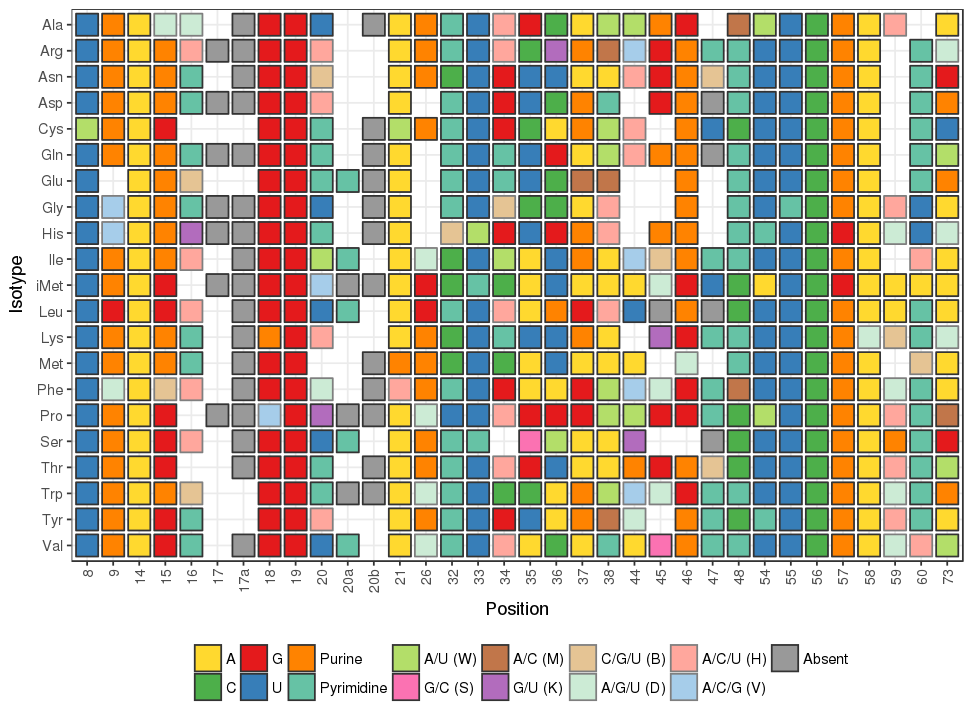

In [4]:
options(repr.plot.width=8.1, repr.plot.height=6)
isotype_specific %>% 
  filter(!str_detect(positions, '\\.')) %>%
  mutate(positions=factor(positions, names(single_positions))) %>%
  mutate(identity=factor(identity, single_identities)) %>%
  mutate(identity = revalue(identity, simple_identities)) %>%
  ggplot() + geom_tile(aes(x=positions, y=isotype, fill=identity, color=identity), width=0.85, height=0.85, size=0.5) + 
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') + 
    scale_x_discrete(labels=single_positions) +
    scale_y_discrete(limits=rev(isotypes)) + 
    scale_color_manual(values=colors) +
    scale_fill_manual(values=fills) +
    guides(fill=guide_legend(title=NULL, nrow=2), color=guide_legend(title=NULL, nrow=2)) + 
    xlab('Position') + ylab('Isotype')

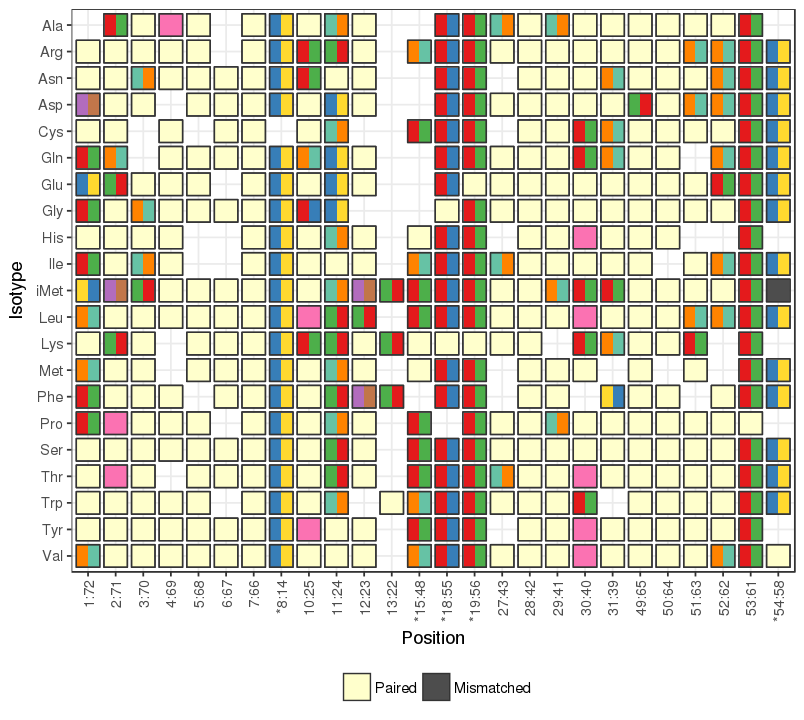

In [5]:
options(repr.plot.width=6.7, repr.plot.height=6)
get_5prime = Vectorize(function(identity) c("GC"="G", "AU"="A", "UA"="U", "CG"="C", "GU"="G", "UG"="U", "Absent"="Absent", "PurinePyrimidine"="Purine", "PyrimidinePurine"="Pyrimidine", "StrongPair"="Strong", "WeakPair"="Weak", "AminoKeto"="Amino", "KetoAmino"="Keto", "Paired"="Paired", "Bulge"="Bulge", "Mismatched"="Mismatched")[identity])
get_3prime = Vectorize(function(identity) c("GC"="C", "AU"="U", "UA"="A", "CG"="G", "GU"="U", "UG"="G", "Absent"="Absent", "PurinePyrimidine"="Pyrimidine", "PyrimidinePurine"="Purine", "StrongPair"="Strong", "WeakPair"="Weak", "AminoKeto"="Keto", "KetoAmino"="Amino", "Paired"="Paired", "Bulge"="Bulge", "Mismatched"="Mismatched")[identity])

isotype_specific %>% 
  filter(str_detect(positions, '\\.') & positions %in% names(paired_positions)) %>%
  mutate(positions=factor(positions, names(paired_positions))) %>%
  ungroup() %>%
  mutate(isotype=factor(isotype, levels=rev(isotypes))) %>%
  mutate(left=get_5prime(identity), right=get_3prime(identity)) %>%
  gather(side, half_identity, left, right, -isotype, -positions, -identity) %>%
  mutate(side=as.integer(as.factor(side))-1) %>% 
  mutate(xmin=as.integer(positions)+0.5*side-0.5+0.1*(1-side),
         xmax=as.integer(positions)+0.5*side-0.1*side,
         ymin=as.integer(isotype)-0.5+0.1,
         ymax=as.integer(isotype)+0.5-0.1) %>%
  mutate(half_identity=factor(half_identity)) %>% 
  ggplot() + 
    geom_rect(aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, fill=half_identity)) + 
    geom_tile(aes(x=positions, y=isotype, color=identity), alpha=0, width=0.85, height=0.85, size=0.4) +
    scale_x_discrete(labels=paired_positions, drop=FALSE) +
    scale_y_discrete(limits=rev(isotypes), breaks=rev(isotypes)) +
    scale_color_manual(breaks=c("Paired", "Mismatched"), values=colors) +
    scale_fill_manual(breaks=c("Paired", "Mismatched"), values=fills) +
    guides(fill=guide_legend(title=NULL), color=guide_legend(title=NULL), alpha=FALSE) +    
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5),          
      legend.position='bottom') + 
    xlab('Position') + ylab('Isotype')

# Clade-isotype-specific heatmaps

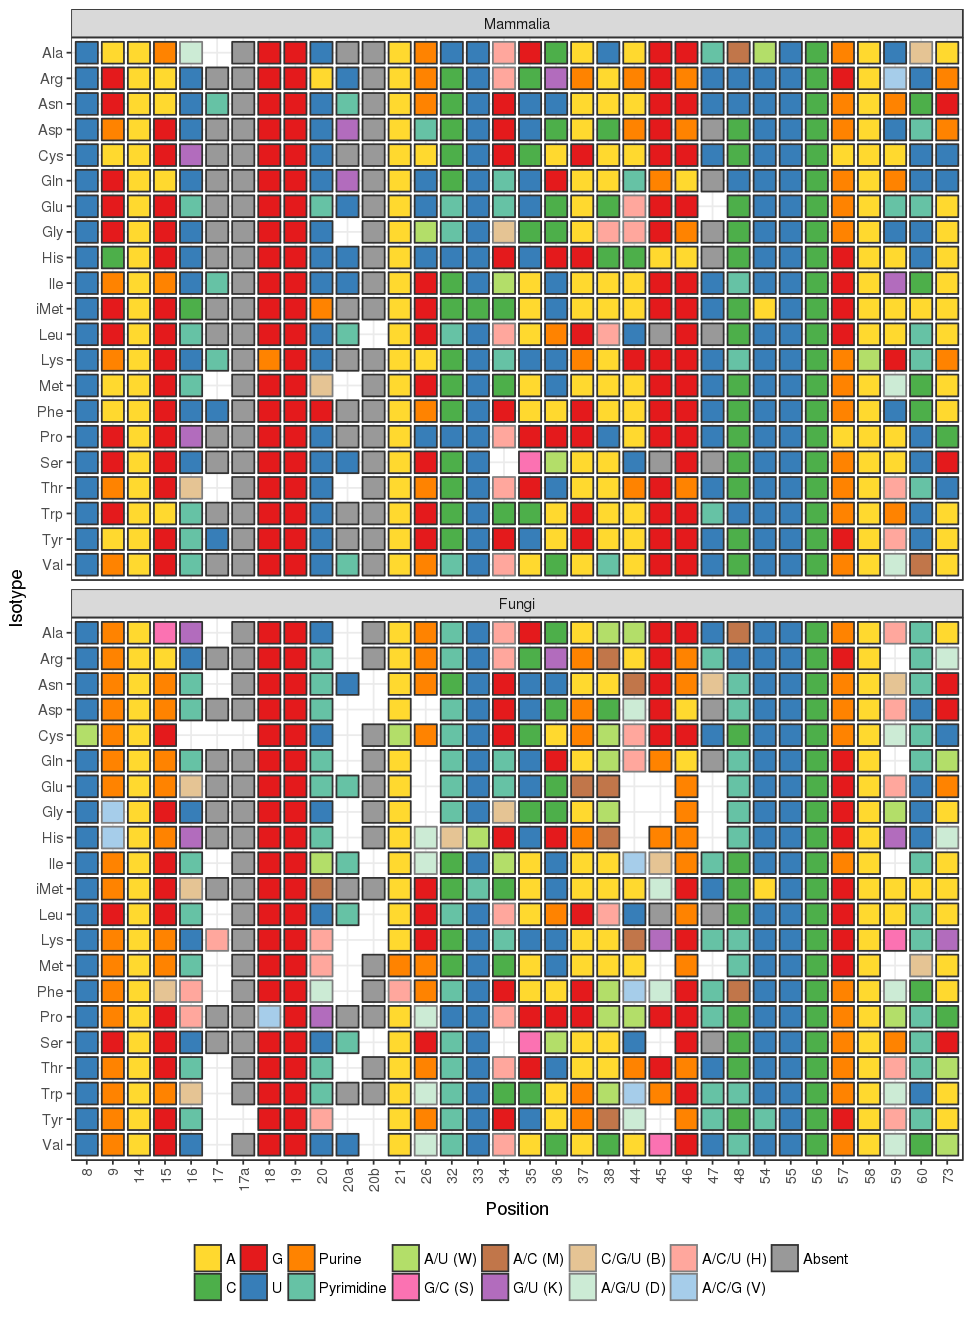

In [26]:
options(repr.plot.width=8.1, repr.plot.height=11)
clade_isotype_specific %>%
  filter(clade %in% c("Mammalia", "Fungi")) %>%
  filter(!(str_detect(positions, '\\.')) & positions %in% names(single_positions)) %>%
  mutate(positions = factor(positions, names(single_positions))) %>%
  mutate(identity = factor(identity, single_identities)) %>%
  mutate(identity = revalue(identity, simple_identities)) %>%
  ungroup() %>%
  mutate(clade=factor(clade, levels=c("Mammalia", "Fungi"))) %>%
  ggplot() + geom_tile(aes(x=positions, y=isotype, fill=identity, color=identity), width=0.85, height=0.85, size=0.5) + 
    facet_wrap(~ clade, nrow=2) +
    scale_x_discrete(labels=single_positions) +
    scale_y_discrete(limits=rev(isotypes)) + 
    scale_color_manual(values=colors) +
    scale_fill_manual(values=fills) +
    guides(fill=guide_legend(title=NULL, nrow=2), color=guide_legend(title=NULL, nrow=2)) + 
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') + 
    xlab('Position') + ylab('Isotype')

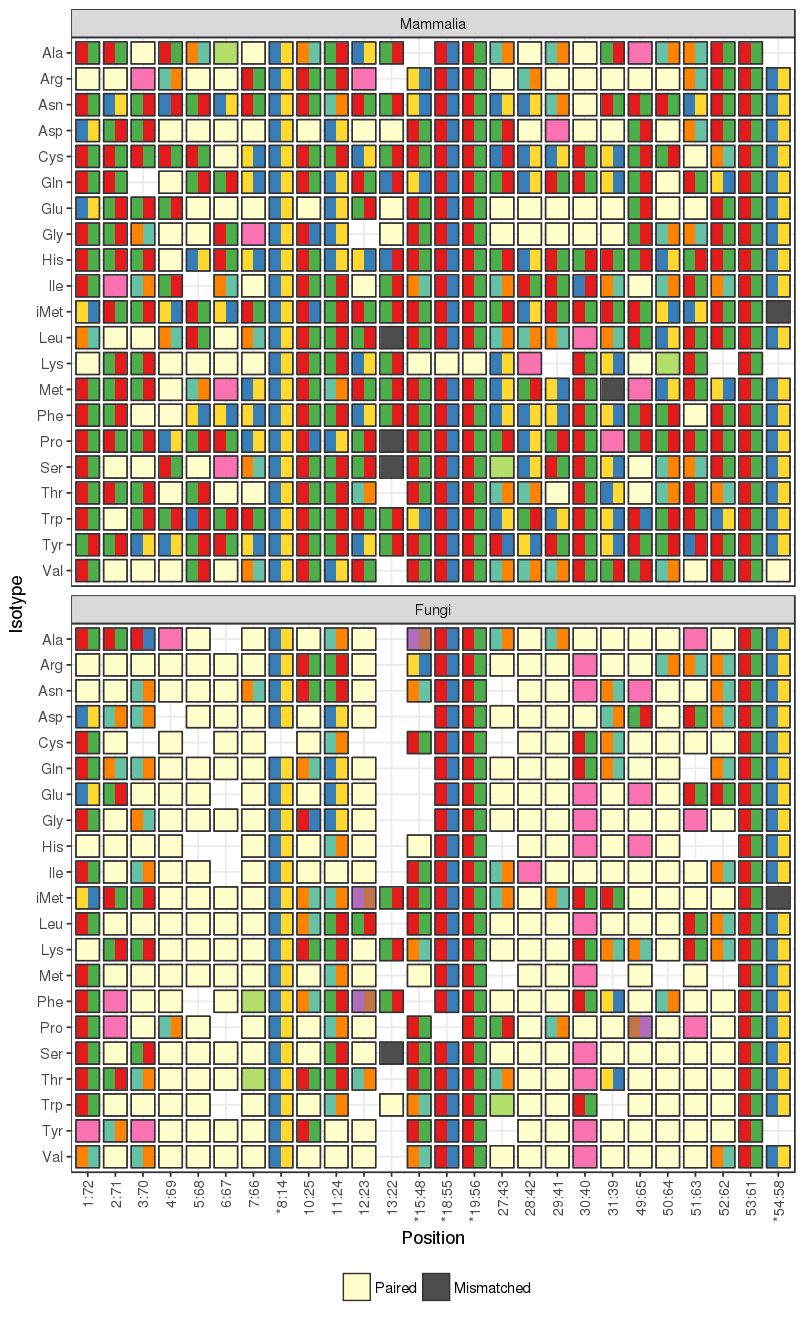

In [28]:
options(repr.plot.width=6.7, repr.plot.height=11)
clade_isotype_specific %>%
  filter(clade %in% c("Mammalia", "Fungi")) %>%
  filter(str_detect(positions, '\\.') & positions %in% names(paired_positions)) %>%
  mutate(positions = factor(positions, names(paired_positions))) %>%
  ungroup() %>%
  mutate(isotype = factor(isotype, levels = rev(isotypes))) %>%
  mutate(clade = factor(clade, levels = c("Mammalia", "Fungi"))) %>%
  mutate(left = get_5prime(identity), right = get_3prime(identity)) %>%
  gather(side, half_identity, left, right, -isotype, -clade, -positions, -identity) %>%
  mutate(side = as.integer(as.factor(side)) - 1) %>% 
  mutate(xmin = as.integer(positions) + 0.5 * side - 0.5 + 0.1 * (1 - side),
         xmax = as.integer(positions)+ 0.5 * side - 0.1 * side,
         ymin = as.integer(isotype) - 0.5 + 0.1,
         ymax = as.integer(isotype) + 0.5 - 0.1) %>%
  mutate(half_identity = factor(half_identity)) %>% 
  ggplot() + 
    geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = half_identity)) + 
    geom_tile(aes(x = positions, y = isotype, color = identity), alpha = 0, width = 0.85, height = 0.85, size = 0.4) + 
    facet_wrap(~ clade, nrow = 2) +
    scale_x_discrete(labels = paired_positions, drop = FALSE) +
    scale_y_discrete(limits = rev(isotypes), breaks = rev(isotypes)) +
    scale_color_manual(breaks = c("Paired", "Mismatched"), values = colors) +
    scale_fill_manual(breaks = c("Paired", "Mismatched"), values = fills) +
    xlab('Position') + ylab('Isotype') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5), legend.position = "bottom") +
    guides(fill = guide_legend(title=NULL), color = guide_legend(title=NULL), alpha = FALSE)

# tRNA features

## Stem and loop lengths

In [6]:
match_identities = c("A:U", "U:A", "G:U", "U:G", "C:G", "G:C")
mismatch_identities = c("A:G", "G:A", "A:C", "C:A", "C:U", "U:C", "A:A", "C:C", "U:U", "G:G", "-:-", "A:-", "-:A", "C:-", "-:C", "G:-", "-:G", "U:-", "-:U")
resolve_match = Vectorize(function(feature) ifelse(feature %in% match_identities, '|', ':'))
get_stem_length = Vectorize(function(stem_length, stem_string) (stem_length - unlist(str_locate(reverse(stem_string), '\\|'))[1] + 1) - unlist(str_locate(stem_string, '\\|'))[1] + 1)
stemloop = identities %>% filter(!restrict) %>%
  rowwise() %>%
  mutate(Astem = get_stem_length(7, paste0(resolve_match(X1.72), resolve_match(X2.71), resolve_match(X3.70), resolve_match(X4.69), resolve_match(X5.68), resolve_match(X6.67), resolve_match(X7.66))),
         Dstem = get_stem_length(4, paste0(resolve_match(X10.25), resolve_match(X11.24), resolve_match(X12.23), resolve_match(X13.22))),
         Cstem = get_stem_length(5, paste0(resolve_match(X27.43), resolve_match(X28.42), resolve_match(X29.41), resolve_match(X30.40), resolve_match(X31.39))),
         TPCstem = get_stem_length(5, paste0(resolve_match(X49.65), resolve_match(X50.64), resolve_match(X51.63), resolve_match(X52.62), resolve_match(X53.61)))) %>%
  select(isotype, Astem, Dstem, D.loop, Cstem, AC.loop, V.arm, TPCstem, TPC.loop) %>%
  group_by(isotype) %>%
  summarize(Astem = mean(Astem, na.rm = TRUE), Dstem = mean(Dstem), Dloop = mean(D.loop), Cstem = mean(Cstem), Cloop = mean(AC.loop), TPCloop = mean(TPC.loop), TPCstem = mean(TPCstem), Varm = mean(V.arm)) %>%
  gather(region, size, -isotype) %>%
  mutate(region = factor(region))

stemloop = rbind(stemloop, cbind(expand.grid(isotype = unique(stemloop$isotype), region = levels(stemloop$region)), size=0))

Warning message:
“Grouping rowwise data frame strips rowwise nature”

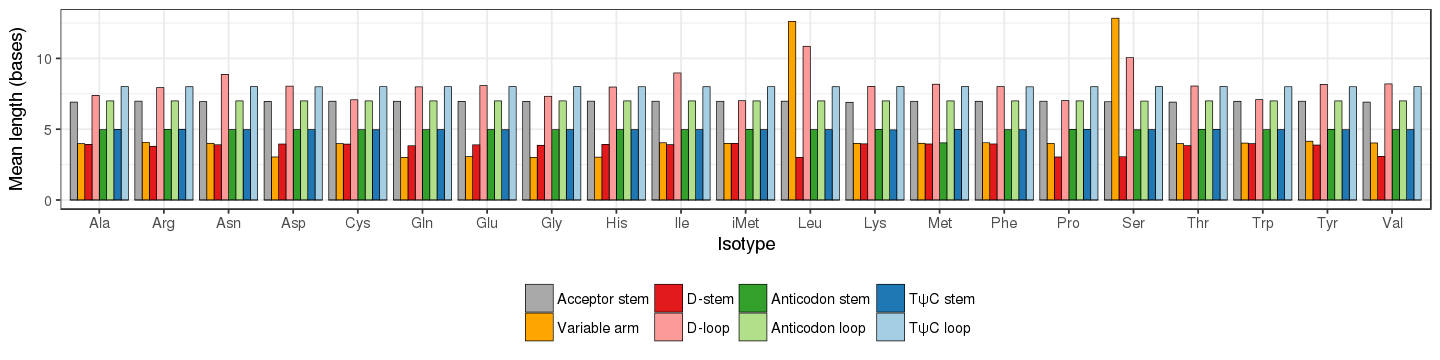

In [7]:
options(repr.plot.width=12, repr.plot.height=3)
stemloop %>% 
  mutate(region = revalue(region, c("Astem" = "Acceptor stem ", "Varm" = "Variable arm ", "Dstem" = "D-stem ", "Dloop" = "D-loop ", "Cstem" = "Anticodon stem ", "Cloop" = "Anticodon loop ", "TPCstem" = "TψC stem ", "TPCloop" = "TψC loop "))) %>%
  mutate(region = factor(region, c("Acceptor stem ", "Variable arm ", "D-stem ", "D-loop ", "Anticodon stem ", "Anticodon loop ", "TψC stem ", "TψC loop "))) %>%
  ggplot() + geom_bar(aes(x = isotype, y = size, fill = region), stat = 'identity', size = 0.2, color = 'black', position = 'dodge') +
    scale_fill_manual(values = c("darkgray", "orange", rev(brewer.pal(6, "Paired")))) + 
    theme(legend.position = "bottom") +
    xlab("Isotype") + ylab("Mean length (bases)") +
    guides(fill = guide_legend(title = NULL))

## Intron lengths

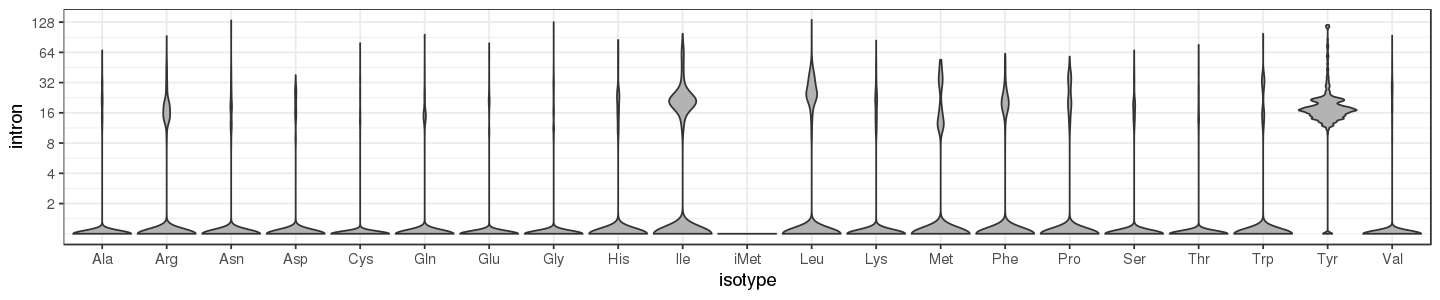

In [8]:
options(repr.plot.width=12, repr.plot.height=2.5)
identities %>% filter(!restrict, intron < 150) %>% select(isotype, intron) %>%
  mutate(intron = intron + 1) %>% # pseudocounts for log scale
  ggplot() + geom_violin(aes(x = isotype, y = intron), fill = 'gray70', scale = 'width', adjust = 0.5) +
    scale_y_continuous(trans = log_trans(), breaks = c(0, 2, 4, 8, 16, 32, 64, 128))

## D-loop insertions

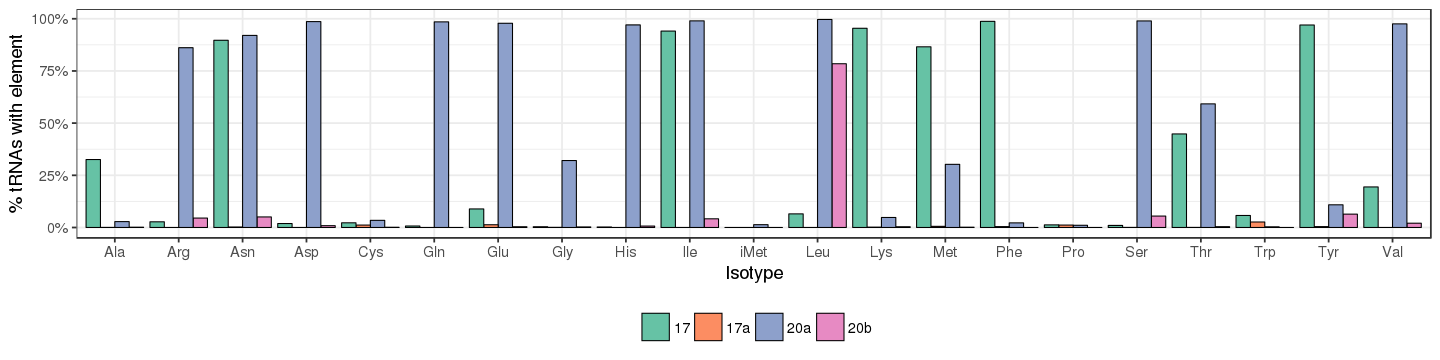

In [9]:
options(repr.plot.width=12, repr.plot.height=3)
identities %>% filter(!restrict) %>%
  select(isotype, X17, X17a, X20a, X20b) %>%
  mutate(X17 = X17 != '-', X17a=X17a != '-', X20a=X20a != '-', X20b=X20b != '-') %>%
  group_by(isotype) %>%
  summarize(`17` = mean(X17), `17a` = mean(X17a), `20a` = mean(X20a), `20b` = mean(X20b)) %>%
  gather(position, freq, -isotype) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = position), stat = 'identity', color = 'black', size = 0.3, position = 'dodge') +
    scale_y_continuous(labels = percent_format()) +
    scale_fill_manual(values = brewer.pal(4, "Set2")) +
    theme(legend.position = "bottom") +
    labs(x = "Isotype", y = "% tRNAs with element") +
    guides(fill = guide_legend(title = NULL))

### N1/N73

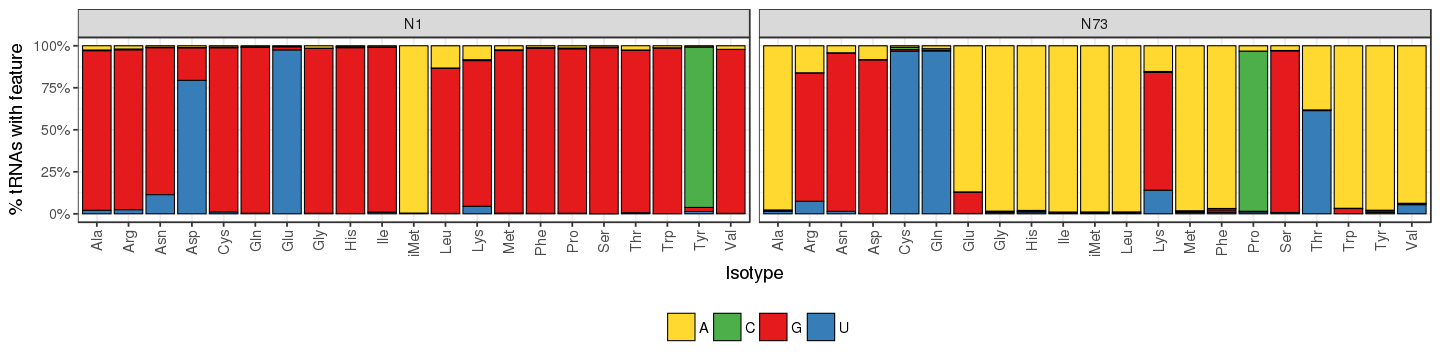

In [14]:
options(repr.plot.width=12, repr.plot.height=3)
identities %>% filter(!restrict) %>% select(isotype, X1, X73) %>%
  gather(position, identity, X1, X73) %>%
  mutate(position = revalue(position, c('X1' = 'N1', 'X73' = 'N73'))) %>%
  filter(identity %in% c("A", "C", "G", "U") & !(isotype %in% c("Sup", "SeC"))) %>%
  group_by(isotype, position, identity) %>%
  summarize(count = n()) %>%
  group_by(isotype, position) %>%
  mutate(freq = count/sum(count)) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = identity), size = 0.3, color = 'black', stat = 'identity') +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    scale_y_continuous(labels = percent) +
    facet_wrap(~ position) +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') +
    labs(fill = '', x = 'Isotype', y = '% tRNAs with feature')

### Anticodon incidence

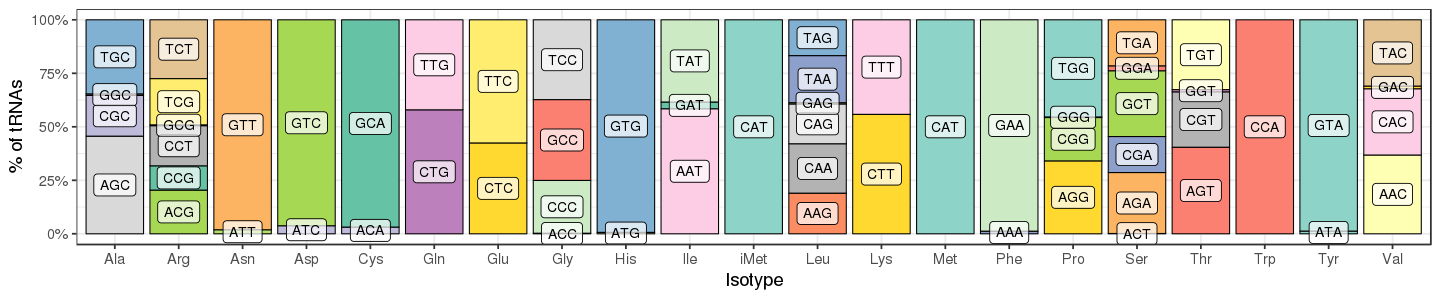

In [15]:
options(repr.plot.width=12, repr.plot.height=2.5)
identities %>% 
  filter(!restrict) %>%
  group_by(isotype, anticodon) %>%
  summarize(count = n()) %>%
  group_by(isotype) %>%
  mutate(freq = count/sum(count)) %>%
  filter(freq > 0.001) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = anticodon), color = 'black', size = 0.3, position = position_stack(reverse = TRUE), stat = 'identity') + 
    geom_label(aes(x = isotype, y = freq, label = anticodon), alpha = 0.7, position = position_stack(vjust = 0.5, reverse = FALSE), size = 3) +
    theme(legend.position = "none") + 
    labs(x = 'Isotype', y = '% of tRNAs') +
    scale_fill_manual(values = sample(rep(x = c(brewer.pal(8, "Set2"), brewer.pal(12, "Set3")), 4), replace = FALSE)) + 
    scale_y_continuous(labels = percent)

## A and B box base frequencies

In [16]:
ab_positions = c('X7' = '7', 'X8'='8', 'X9'='9', 'X10'='10', 'X11'='11', 'X12'='12', 'X13'='13', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X22'='22', 'X23'='23', 'X24'='24', 'X25'='25', 'X52'='52', 'X53'='53', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X61'='61')
df = identities %>% 
  filter(!restrict) %>%
  select(isotype, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X20a, X20b, X21, X22, X23, X24, X25, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61) %>%
  gather(Position, Identity, -isotype) %>%
  mutate(Position = factor(Position, names(ab_positions))) %>%
  filter(Identity %in% c("A", "C", "G", "U") & !(isotype %in% c("Sup", "SeC"))) %>%
  group_by(Position, Identity) %>%
  summarize(Count = n()) %>%
  group_by(Position) %>%
  mutate(freq = round(Count / sum(Count), digits = 1)) %>%
  mutate(feature = ifelse(Position %in% c('X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61'), 'B box', 'A box')) %>%
  mutate(order = rank(Count)) %>% 
  arrange(order) %>% 
  mutate(ymax = cumsum(Count),
         xmin = as.integer(Position) - 0.4,
         xmax = as.integer(Position) + 0.4) %>%
  mutate(ymin = ifelse(order == 1, 0, as.numeric(lag(ymax))))

Warning message:
“attributes are not identical across measure variables; they will be dropped”

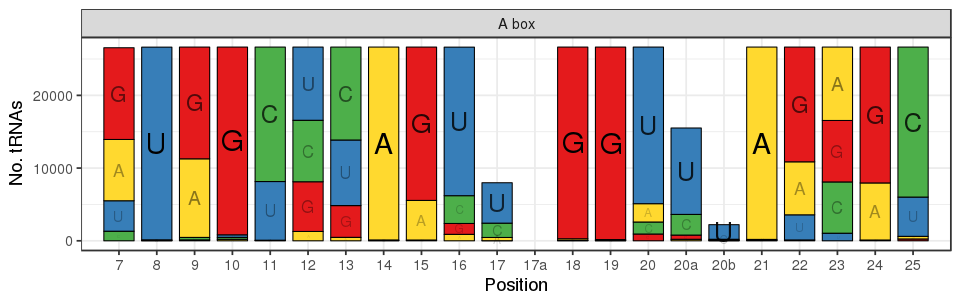

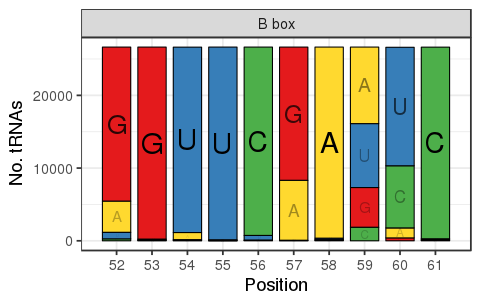

In [17]:
options(repr.plot.width=8, repr.plot.height=2.5)
df %>% filter(feature == "A box") %>% ungroup() %>% 
  ggplot() + geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = Identity), color = 'black', size = 0.3) +
    geom_text(aes(x = (xmin + xmax) / 2, y = (ymin + ymax) / 2, label = Identity, size = freq, alpha = freq)) +
    facet_grid(~ feature, scales = 'free_x', space = 'free_x') +
    scale_x_discrete(limits = 1:22, labels = c('7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '22', '23', '24', '25')) +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    theme(legend.position='none') +
    labs(fill = '', x = 'Position', y = 'No. tRNAs')

options(repr.plot.width=4, repr.plot.height=2.5)
df %>% filter(feature == "B box") %>% ungroup() %>% 
  ggplot() + geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = Identity), color = 'black', size = 0.3) +
    geom_text(aes(x = (xmin + xmax) / 2, y = (ymin + ymax) / 2, label = Identity, size = freq, alpha = freq)) +
    facet_grid(~ feature, scales = 'free_x', space = 'free_x') +
    scale_x_discrete(limits = 23:32, labels = c('52', '53', '54', '55', '56', '57', '58', '59', '60', '61')) + 
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    theme(legend.position='none') +
    labs(fill = '', x = 'Position', y = 'No. tRNAs')

# Identity stories

## 18:55

In [28]:
identities %>% select(clade, isotype, anticodon) %>%
  filter(isotype == "Pro" & clade == "Fungi") %>%
  group_by(clade, isotype, anticodon) %>%
  summarize(count=n())

identities %>% select(clade, isotype, X47) %>%
  filter(isotype == "Pro" & clade == "Fungi") %>%
  group_by(clade, isotype, X47) %>%
  summarize(count=n()) %>%
  spread(X47, count)

identities %>% select(clade, species, species_long, seqname, isotype, score, X47) %>%
  filter(isotype == "Pro" & clade == "Fungi" & X47 == "-")

,clade,isotype,anticodon,count
1,Fungi,Pro,AGG,228
2,Fungi,Pro,CGG,35
3,Fungi,Pro,TGG,256


,clade,isotype,-,C,U
1,Fungi,Pro,2,193,324


,clade,species,species_long,seqname,isotype,score,X47
1,Fungi,enceHell_ATCC50504,Encephalitozoon hellem ATCC 50504,enceHell_ATCC50504_chrX.trna2-ProCGG,Pro,60.7,-
2,Fungi,enceInte_ATCC50506,Encephalitozoon intestinalis ATCC 50506,enceInte_ATCC50506_chrX.trna2-ProCGG,Pro,63.4,-


## 11:24

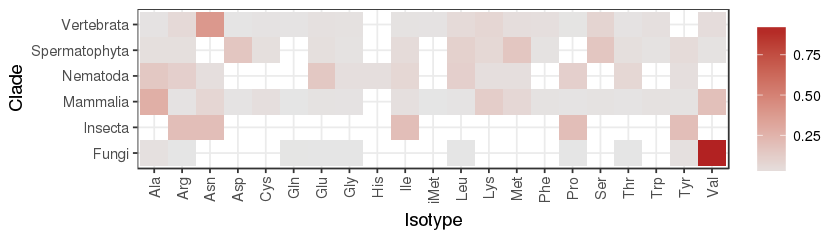

In [29]:
options(repr.plot.width=7, repr.plot.height=2)
identities %>% select(clade, isotype, X11.24) %>%
  filter(!(X11.24 %in% c("C:G", "U:A"))) %>%
  group_by(clade, isotype) %>%
  summarize(count = n()) %>%
  group_by(clade) %>%
  mutate(freq = count/sum(count)) %>%
  ggplot() + geom_tile(aes(x = isotype, y = clade, fill = freq)) +
    scale_fill_continuous(low = 'gray90', high = 'firebrick') +
    labs(x = 'Isotype', y = 'Clade', fill = '') +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5))

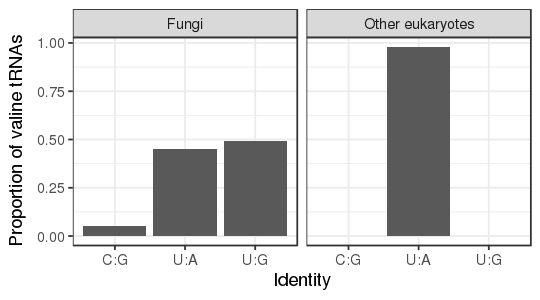

In [30]:
options(repr.plot.width=4.5, repr.plot.height=2.5)
identities %>% select(clade, isotype, X11.24) %>%
  filter(isotype == "Val") %>%
  mutate(clade=ifelse(clade == "Fungi", "Fungi", "Other eukaryotes")) %>%
  group_by(clade) %>%
  mutate(total=n()) %>%
  group_by(clade, total, X11.24) %>%
  summarize(count=n()) %>%
  mutate(freq=count/total) %>%
  filter(freq >= 0.01) %>%
  ggplot() + geom_bar(aes(x = X11.24, y = freq), stat = 'identity') + 
    labs(x = 'Identity', y = 'Proportion of valine tRNAs') + facet_wrap(~ clade)

# Supplementary tables & figures

# Clade-isotype-specific heatmaps

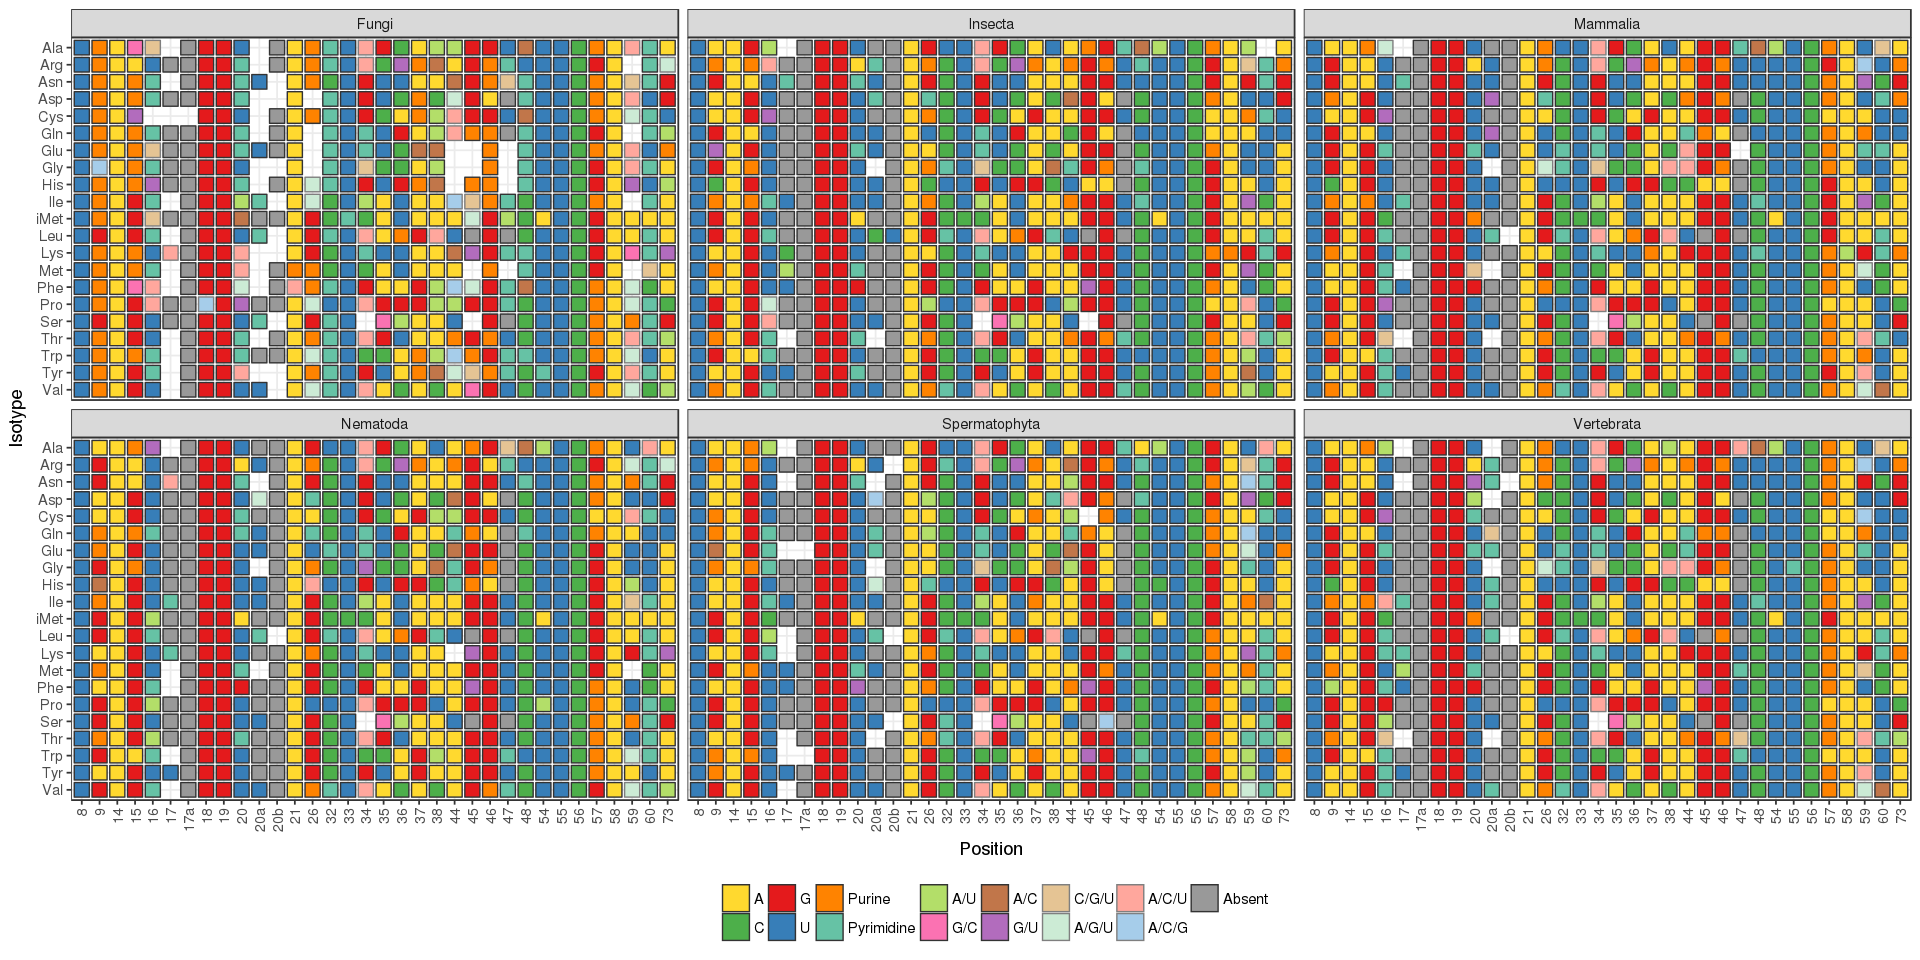

In [12]:
options(repr.plot.width=16, repr.plot.height=8)
clade_isotype_specific %>%
  filter(!(str_detect(positions, '\\.')) & positions %in% names(single_positions)) %>%
  mutate(positions=factor(positions, names(single_positions))) %>%
  mutate(identity=factor(identity, single_identities)) %>%
  mutate(identity = revalue(identity, simple_identities)) %>%
  ungroup() %>%
  ggplot() + geom_tile(aes(x=positions, y=isotype, fill=identity, color=identity), width=0.85, height=0.85, size=0.4) + 
    facet_wrap(~ clade, nrow=2) +
    scale_x_discrete(labels=single_positions) +
    scale_y_discrete(limits=rev(isotypes)) + 
    scale_color_manual(values=colors) +
    scale_fill_manual(values=fills) +
    guides(fill=guide_legend(title=NULL, nrow=2), color=guide_legend(title=NULL, nrow=2)) + 
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') + 
    xlab('Position') + ylab('Isotype')

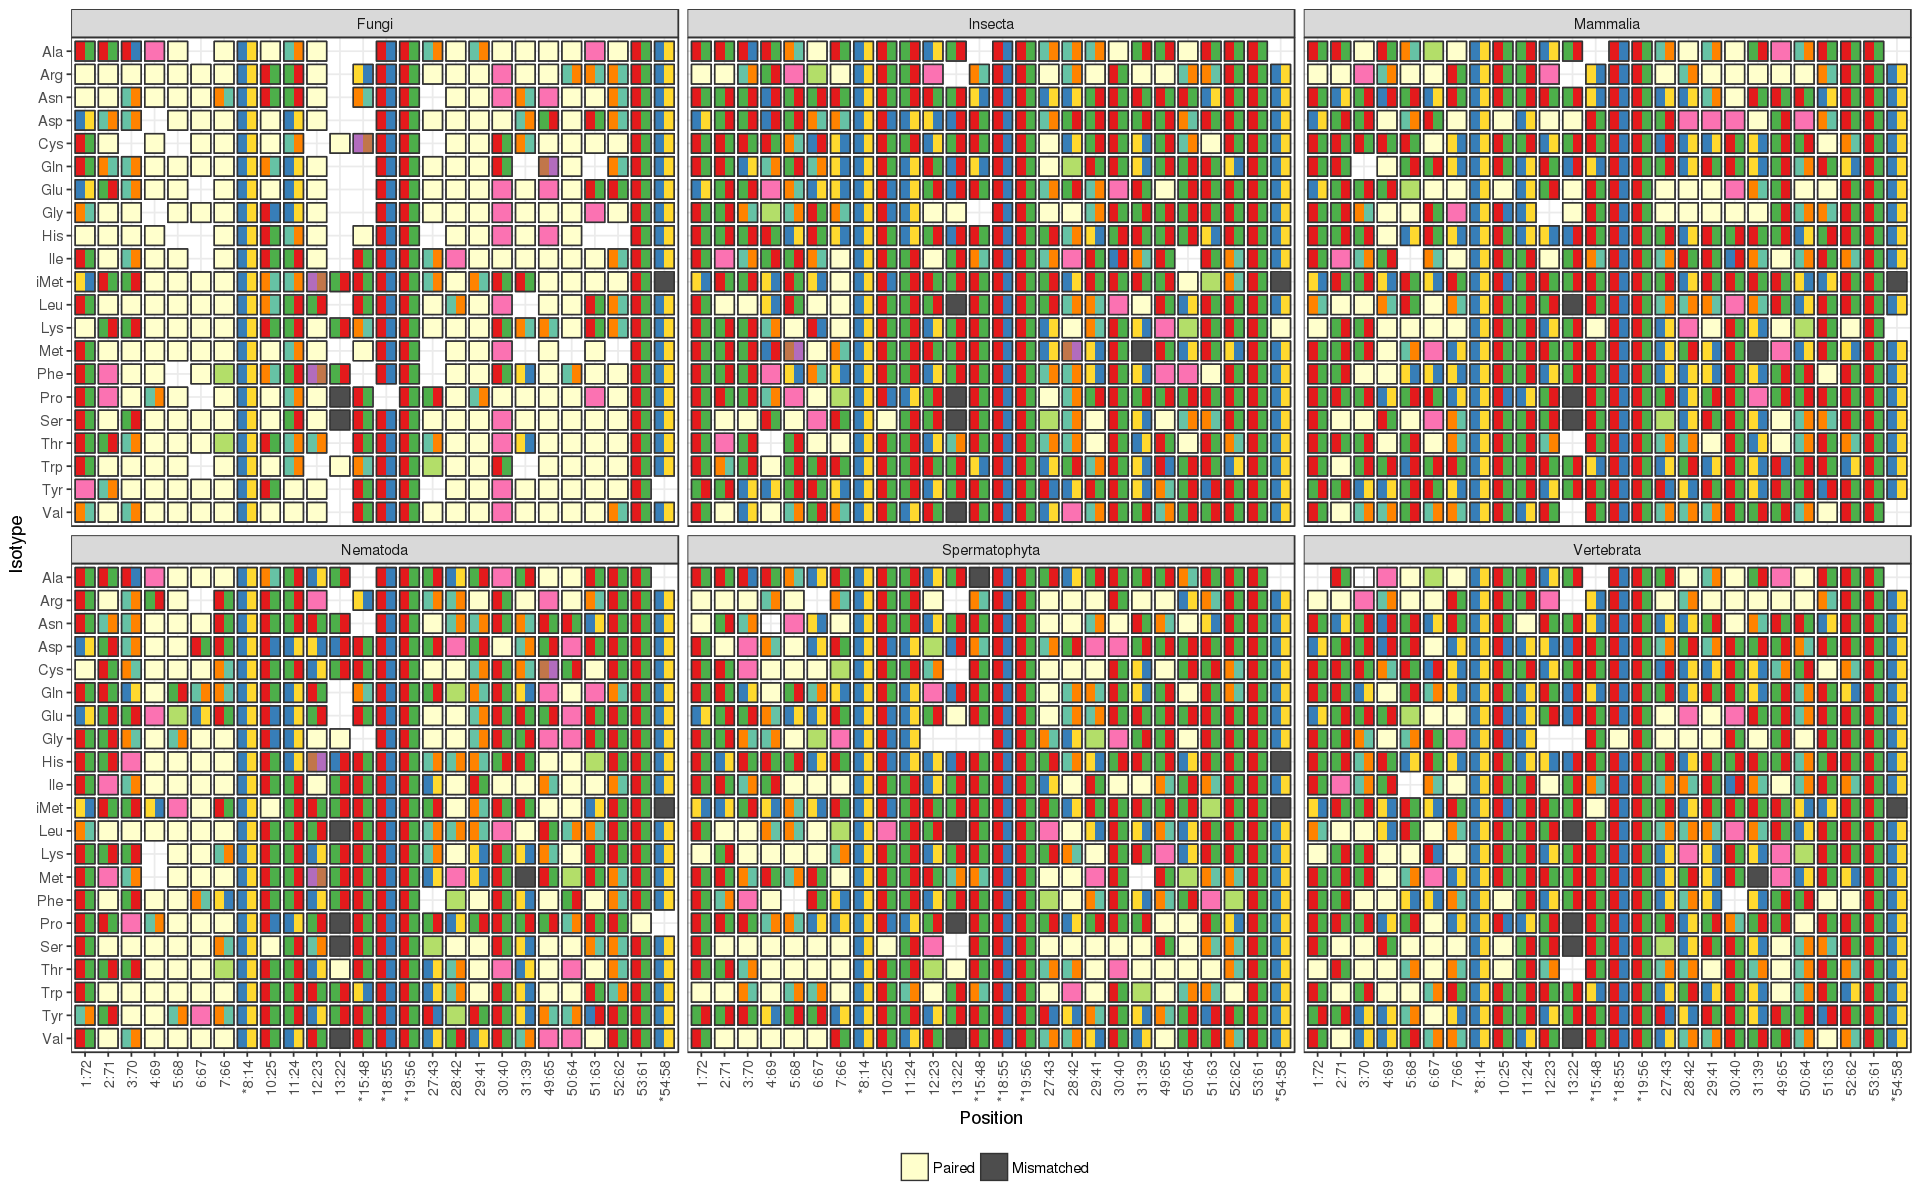

In [13]:
options(repr.plot.width=16, repr.plot.height=10)
clade_isotype_specific %>%
  filter(str_detect(positions, '\\.') & positions %in% names(paired_positions)) %>%
  mutate(positions=factor(positions, names(paired_positions))) %>%
  ungroup() %>%
  mutate(isotype=factor(isotype, levels=rev(isotypes))) %>%
  mutate(left=get_5prime(identity), right=get_3prime(identity)) %>%
  gather(side, half_identity, left, right, -isotype, -clade, -positions, -identity) %>%
  mutate(side=as.integer(as.factor(side))-1) %>% 
  mutate(xmin=as.integer(positions)+0.5*side-0.5+0.1*(1-side),
         xmax=as.integer(positions)+0.5*side-0.1*side,
         ymin=as.integer(isotype)-0.5+0.1,
         ymax=as.integer(isotype)+0.5-0.1) %>%
  mutate(half_identity=factor(half_identity)) %>% 
  ggplot() + geom_rect(aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, fill=half_identity)) + 
    geom_tile(aes(x=positions, y=isotype, color=identity), alpha=0, width=0.85, height=0.85, size=0.4) + 
    facet_wrap(~ clade, nrow=2) +
    scale_x_discrete(labels=paired_positions, drop=FALSE) +
    scale_y_discrete(limits=rev(isotypes), breaks=rev(isotypes)) +
    scale_color_manual(breaks=c("Paired", "Mismatched"), values=colors) +
    scale_fill_manual(breaks=c("Paired", "Mismatched"), values=fills) +
    xlab('Position') + ylab('Isotype') +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position="bottom") +
    guides(fill=guide_legend(title=NULL), color=guide_legend(title=NULL), alpha=FALSE)

# Restricted set stats

## Clade-isotype restricted set stats

In [5]:
df = identities %>% group_by(isotype, clade, restrict) %>% 
  summarize(count = n()) %>%
  ungroup()

df = rbind(df, cbind(expand.grid(isotype = unique(df$isotype), 
                                 clade = unique(df$clade), 
                                 restrict = unique(df$restrict)), count = 0)) %>%
  rbind(df %>% group_by(clade, restrict) %>% summarize(isotype = "Total", count = sum(count)) %>% ungroup) %>%
  rbind(df %>% group_by(isotype, restrict) %>% summarize(clade = "Total", count = sum(count)) %>% ungroup) %>%
  rbind(df %>% group_by(restrict) %>% summarize(isotype = "Total", clade = "Total", count = sum(count)) %>% ungroup)

df %>% group_by(isotype, clade, restrict) %>% 
  summarize(count = sum(count)) %>%
  group_by(isotype, clade) %>%
  arrange(restrict) %>%
  summarize(count = paste0(paste0(count, collapse=' ('), ')')) %>%
  spread(isotype, count) %>%
  kable(format = 'html') %>% paste0(collapse = '\n') %>% display_html()

clade,Ala,Arg,Asn,Asp,Cys,Gln,Glu,Gly,His,Ile,iMet,Leu,Lys,Met,Phe,Pro,Ser,Thr,Trp,Tyr,Val,Total
Fungi,259 (520),394 (484),144 (274),88 (441),108 (95),197 (239),148 (427),235 (620),83 (134),172 (428),76 (109),379 (487),224 (618),116 (128),139 (274),190 (329),383 (488),316 (391),87 (136),110 (196),319 (471),4167 (7289)
Insecta,91 (220),160 (197),32 (109),36 (182),53 (62),89 (110),75 (225),84 (268),23 (92),83 (115),28 (68),154 (200),68 (238),40 (67),33 (100),87 (187),131 (174),109 (175),36 (78),103 (65),117 (201),1632 (3133)
Mammalia,982 (2022),867 (372),287 (392),158 (353),593 (563),350 (297),465 (456),515 (728),76 (292),362 (361),88 (317),714 (431),739 (709),275 (104),228 (247),220 (558),688 (503),670 (207),234 (103),307 (194),572 (1028),9390 (10237)
Nematoda,95 (287),142 (284),36 (164),30 (211),26 (102),66 (177),81 (326),99 (350),28 (134),61 (201),18 (78),152 (271),71 (367),28 (84),35 (116),86 (328),151 (276),113 (240),29 (95),46 (127),108 (215),1501 (4433)
Spermatophyta,201 (570),321 (398),166 (234),107 (385),107 (153),160 (208),155 (444),180 (631),39 (179),178 (333),45 (159),294 (556),213 (433),85 (192),82 (249),181 (507),302 (531),241 (244),69 (203),142 (204),211 (416),3479 (7229)
Vertebrata,306 (535),371 (788),187 (895),75 (411),186 (276),216 (493),277 (649),250 (870),85 (297),211 (467),71 (379),458 (1124),294 (1343),139 (409),179 (250),185 (764),415 (1318),370 (549),134 (146),187 (347),301 (731),4897 (13041)
Total,1934 (4154),2255 (2523),852 (2068),494 (1983),1073 (1251),1078 (1524),1201 (2527),1363 (3467),334 (1128),1067 (1905),326 (1110),2151 (3069),1609 (3708),683 (984),696 (1236),949 (2673),2070 (3290),1819 (1806),589 (761),895 (1133),1628 (3062),25066 (45362)


## Species-isotype restricted set stats

In [32]:
df = identities %>% group_by(isotype, species_long, clade, restrict) %>% 
  summarize(count = n()) %>%
  ungroup()

df = rbind(df, cbind(expand.grid(isotype = unique(df$isotype), 
                                 clade = unique(df$clade), 
                                 species_long = unique(df$species_long),
                                 restrict = unique(df$restrict)), count = 0)) %>%
  rbind(df %>% group_by(clade, species_long, restrict) %>% summarize(isotype = "Total", count = sum(count)) %>% ungroup) %>%
  rbind(df %>% group_by(clade, restrict) %>% summarize(isotype = "Total", species_long = clade[1], count = sum(count)) %>% ungroup) %>%
  rbind(df %>% group_by(isotype, restrict) %>% summarize(clade = "Total", species_long = "", count = sum(count)) %>% ungroup) %>%
  rbind(df %>% group_by(restrict) %>% summarize(isotype = "Total", species_long = "", clade = "Total", count = sum(count)) %>% ungroup)

df = df %>% group_by(isotype, clade, species_long, restrict) %>% 
  summarize(count = sum(count)) %>%
  group_by(isotype, clade, species_long) %>%
  arrange(restrict) %>%
  summarize(count = paste0(paste0(count, collapse=' ('), ')')) %>%
  spread(isotype, count) %>%
  na.omit

df %>% head %>% kable %>% paste0(collapse = '\n') %>% display_markdown

write.table(df, file = 'table-s2.tsv', sep = '\t', quote = FALSE, row.names = FALSE)

|clade |species_long                 |Ala    |Arg    |Asn   |Asp    |Cys   |Gln   |Glu   |Gly    |His   |Ile   |iMet  |Leu   |Lys    |Met   |Phe   |Pro   |Ser    |Thr   |Trp   |Tyr   |Val   |Total     |
|:-----|:----------------------------|:------|:------|:-----|:------|:-----|:-----|:-----|:------|:-----|:-----|:-----|:-----|:------|:-----|:-----|:-----|:------|:-----|:-----|:-----|:-----|:---------|
|Fungi |Aspergillus fumigatus Af293  |6 (7)  |9 (7)  |4 (1) |2 (7)  |3 (0) |4 (4) |2 (0) |3 (12) |1 (1) |3 (5) |1 (3) |6 (7) |2 (7)  |3 (1) |3 (2) |3 (4) |5 (7)  |6 (5) |1 (2) |1 (4) |6 (4) |74 (90)   |
|Fungi |Aspergillus nidulans FGSC A4 |4 (9)  |8 (8)  |5 (1) |1 (7)  |1 (2) |4 (3) |2 (5) |4 (11) |2 (3) |5 (3) |1 (2) |6 (5) |2 (8)  |2 (1) |2 (3) |8 (2) |6 (6)  |5 (5) |1 (2) |5 (1) |4 (7) |78 (94)   |
|Fungi |Aspergillus oryzae RIB40     |6 (10) |9 (12) |4 (4) |3 (10) |3 (0) |7 (4) |5 (8) |4 (15) |4 (1) |7 (5) |2 (0) |3 (3) |4 (10) |2 (1) |2 (5) |5 (5) |11 (6) |5 (9) |1 (3) |8 (2) |5 (8) |100 (121) |
|Fungi |Botrytis cinerea B05.10      |2 (7)  |12 (5) |5 (1) |0 (0)  |4 (0) |4 (2) |3 (2) |1 (0)  |0 (0) |3 (5) |1 (3) |7 (6) |8 (5)  |3 (1) |4 (3) |2 (9) |6 (8)  |6 (3) |1 (4) |1 (0) |3 (8) |76 (72)   |
|Fungi |Candida albicans WO-1        |3 (5)  |4 (5)  |2 (1) |1 (5)  |2 (0) |2 (0) |1 (0) |3 (5)  |0 (0) |3 (4) |1 (1) |6 (6) |4 (3)  |1 (1) |0 (0) |1 (2) |5 (5)  |4 (3) |1 (1) |3 (1) |5 (3) |52 (51)   |
|Fungi |Candida dubliniensis CD36    |3 (5)  |4 (5)  |4 (0) |1 (5)  |2 (0) |1 (0) |1 (0) |4 (5)  |0 (0) |2 (5) |1 (1) |5 (6) |4 (4)  |1 (1) |0 (0) |1 (4) |4 (5)  |4 (4) |1 (1) |4 (0) |5 (5) |52 (56)   |

# Consensus elements by cutoff

In [7]:
resolve_code = function(codes) {
  codes = unique(codes)
  x = c(A = all(codes %in% 'A'),
        C = all(codes %in% 'C'),
        G = all(codes %in% 'G'),
        U = all(codes %in% 'U'),
        Absent = all(codes %in% 'Absent'),
        Purine = all(codes %in% c('A', 'G', 'Purine')),
        Pyrimidine = all(codes %in% c('C', 'U', 'Pyrimidine')),
        Weak = all(codes %in% c('A', 'U', 'Weak')),
        Strong = all(codes %in% c('G', 'C', 'Strong')),
        Amino = all(codes %in% c('A', 'C', 'Amino')),
        Keto = all(codes %in% c('G', 'U', 'Keto')),
        B = all(codes %in% c('C', 'G', 'U', 'B', 'Strong', 'Pyrimidine', 'Keto')),
        D = all(codes %in% c('A', 'G', 'U', 'D', 'Purine', 'Weak', 'Keto')),
        H = all(codes %in% c('A', 'C', 'U', 'H', 'Amino', 'Weak', 'Pyrimidine')),
        V = all(codes %in% c('A', 'C', 'G', 'V', 'Amino', 'Purine', 'Strong')),
        GC = all(codes %in% 'GC'),
        AU = all(codes %in% 'AU'),
        UA = all(codes %in% 'UA'),
        CG = all(codes %in% 'CG'),
        GU = all(codes %in% 'GU'),
        UG = all(codes %in% 'UG'),
        PurinePyrimidine = all(codes %in% c('AU', 'GC', 'PurinePyrimidine')),
        PyrimidinePurine = all(codes %in% c('UA', 'CG', 'PyrimidinePurine')),
        StrongPair = all(codes %in% c('GC', 'CG', 'StrongPair')),
        WeakPair = all(codes %in% c('AU', 'UA', 'WeakPair')),
        AminoKeto = all(codes %in% c('AU', 'CG', 'AminoKeto')),
        KetoAmino = all(codes %in% c('UA', 'GC', 'KetoAmino')),
        Wobble = all(codes %in% c('GU', 'UG', 'Wobble')),
        Paired = all(codes %in% c('AU', 'UA', 'CG', 'GC', 'GU', 'UG', 'Paired', 'PurinePyrimidine', 'PyrimidinePurine', 'StrongPair', 'WeakPair', 'AminoKeto', 'KetoAmino', 'Wobble')),
        Bulge = all(codes %in% 'Bulge'),
        Mismatched = all(codes %in% c('AA', 'GG', 'CC', 'UU', 'AG', 'AC', 'CA', 'CU', 'GA', 'UC', 'Mismatched')))
  return(names(x[which(x)]))
}

get_consensus_IDE = function(position, codes) {
  position = unique(position)
  best_codes = resolve_code(codes) # returns a vector of all possible combinations of bases. Note that this is not limited to the basic combinations given by the codes variable.
  if (length(position) != 1) stop("Multiple positions passed to function")
  if (length(codes) != 126) return("N/A") # make sure that each isotype/clade is represented
  if (length(best_codes) == 0) return("N/A")
  codes = list(A="A", C="C", G="G", U="U", Absent=c("-", ".", "-:-"), Purine=c("A", "G"), Pyrimidine=c("C", "U"), Weak=c("A", "U"), Strong=c("G", "C"), Amino=c("A", "C"), Keto=c("G", "U"), B=c("C", "G", "U"), D=c("A", "G", "U"), H=c("A", "C", "U"), V=c("A", "C", "G"), D=c("A", "G", "U"), GC="G:C", AU="A:U", UA="U:A", CG="C:G", GU="G:U", UG= "U:G", PurinePyrimidine=c("A:U", "G:C"), PyrimidinePurine=c("U:A", "C:G"), AminoKeto=c("A:U", "C:G"), KetoAmino=c("U:A", "G:C"), StrongPair=c("G:C", "C:G"), WeakPair=c("A:U", "U:A"), Wobble=c("G:U", "U:G"), Paired=c("A:U", "U:A", "C:G", "G:C", "G:U", "U:G"), Bulge=c("A:-", "U:-", "C:-", "G:-", "-:A", "-:G", "-:C", "-:U"), Mismatched=c("A:A", "G:G", "C:C", "U:U", "A:G", "A:C", "C:A", "C:U", "G:A", "U:C"))   # for each possible code, check each species
  # for each possible code, check each species
  # this ensures that we consider other IDEs if the most specific one fails the species check. For example, if "Purine" fails, we also consider "V"
  species_check = sapply(best_codes, function(code) {
    codes_str = paste0("c('", paste0(codes[[code]], collapse="', '"), "')")
    df = identities %>%
           select_('species', 'isotype', position) %>%
           group_by_('species', 'isotype') %>% 
           summarize_(match = paste0("sum(", position, " %in% ", codes_str, ")"),
                      miss = paste0("sum(!(", position, " %in% ", codes_str, "))")) %>%
           mutate(ubiquitous = (match / (match + miss)) > 0.1)
    all(df$ubiquitous)
  })
  ide = names(species_check[species_check])[1]
  return(ifelse(is.na(ide), "N/A", ide))
}

code_groups = c('A'=1, 'C'=1, 'G'=1, 'U'=1, 'Absent'=1, 
                'Purine'=2, 'Pyrimidine'=2,
                'Weak'=3, 'Strong'=3, 'Amino'=3, 'Keto'=3,
                'B'=4, 'D'=4, 'H'=4, 'V'=4,
                'GC'=1, 'AU'=1, 'UA'=1, 'CG'=1, 'GU'=1, 'UG'=1,
                'StrongPair'=2, 'WeakPair'=2, 'Wobble'=2,
                'PurinePyrimidine'=3, 'PyrimidinePurine'=3, 'AminoKeto'=3, 'KetoAmino'=3,
                'Paired'=4, 'Mismatched'=4, 'Bulge'=4)

In [8]:
cutoff_freqs = data.frame()
for (cutoff in c(0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.0)) {
  df = clade_iso_ac_freqs %>%
    group_by(isotype, clade, positions, variable) %>%
    summarize(count=sum(value), freq=sum(value)/sum(total)) %>%
    filter(freq >= cutoff) %>%
    mutate(cutoff=as.character(cutoff)) %>%
    select(isotype, clade, positions, variable, freq, cutoff) %>%
    group_by(isotype, clade, positions) %>%
    arrange(code_groups[variable], desc(freq)) %>%
    filter(row_number(positions) == 1)
  if (nrow(cutoff_freqs) == 0) cutoff_freqs = df
  else cutoff_freqs = rbind(cutoff_freqs, df)
}
cutoff_freqs = cutoff_freqs %>% 
  group_by(positions, cutoff) %>%
  summarize(identity = get_consensus_IDE(positions, variable)) %>%
  select(positions, cutoff, identity) %>% 
  filter(positions %in% c(names(single_positions), names(paired_positions))) %>%
  spread(cutoff, identity)

In [47]:
cutoff_freqs %>% filter(`0.5` != "N/A")

,positions,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1
1,X1.72,Paired,Paired,Paired,Paired,N/A,N/A,N/A,N/A
2,X10.25,Paired,Paired,Paired,Paired,Paired,Paired,N/A,N/A
3,X11.24,Paired,Paired,Paired,Paired,Paired,Paired,N/A,N/A
4,X14,A,A,A,A,A,A,N/A,N/A
5,X18,V,V,V,V,V,V,N/A,N/A
6,X19,G,G,G,G,G,G,N/A,N/A
7,X19.56,GC,GC,GC,GC,GC,N/A,N/A,N/A
8,X2.71,Paired,Paired,Paired,Paired,Paired,N/A,N/A,N/A
9,X28.42,Paired,Paired,Paired,Paired,Paired,N/A,N/A,N/A
10,X29.41,Paired,Paired,Paired,Paired,Paired,N/A,N/A,N/A


# tRNA features by clade

## D loop insertions

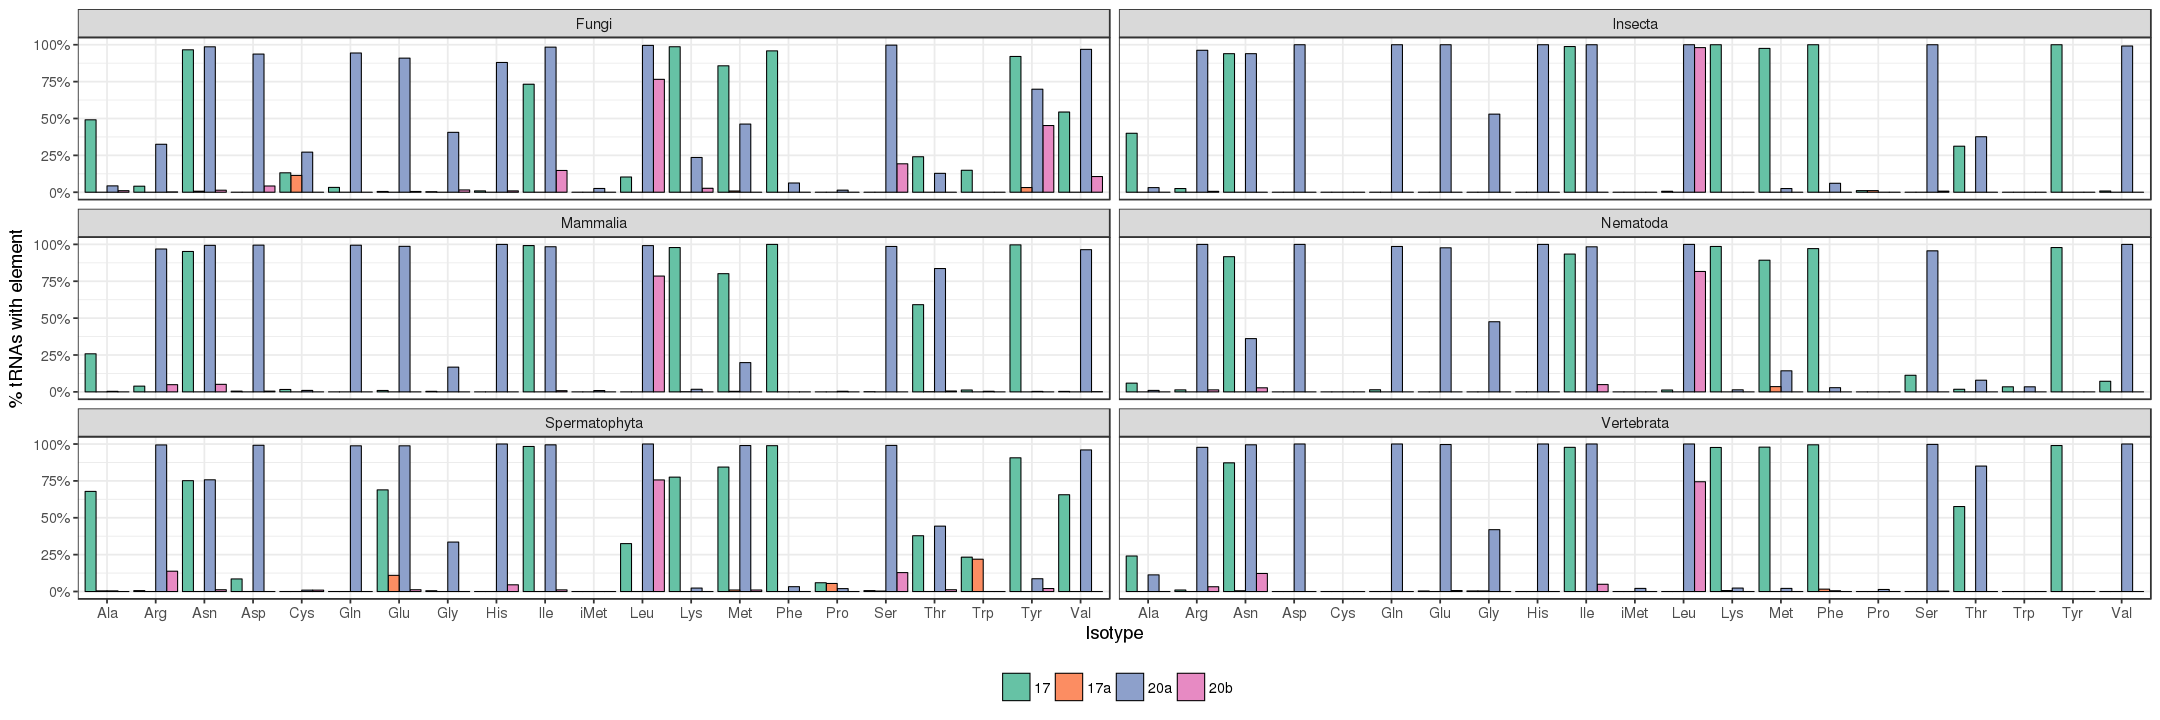

In [31]:
options(repr.plot.width=18, repr.plot.height=6)
identities %>% filter(!restrict) %>%
  select(isotype, clade, X17, X17a, X20a, X20b) %>%
  mutate(X17 = X17 != '-', X17a=X17a != '-', X20a=X20a != '-', X20b=X20b != '-') %>%
  group_by(isotype, clade) %>%
  summarize(`17` = mean(X17), `17a` = mean(X17a), `20a` = mean(X20a), `20b` = mean(X20b)) %>%
  gather(position, freq, -isotype, -clade) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = position), stat = 'identity', color = 'black', size = 0.3, position = 'dodge') +
    facet_wrap(~ clade, ncol = 2) +
    scale_y_continuous(labels = percent_format()) +
    scale_fill_manual(values = brewer.pal(4, "Set2")) +
    theme(legend.position = "bottom") +
    labs(x = "Isotype", y = "% tRNAs with element") +
    guides(fill = guide_legend(title = NULL))

## Intron length

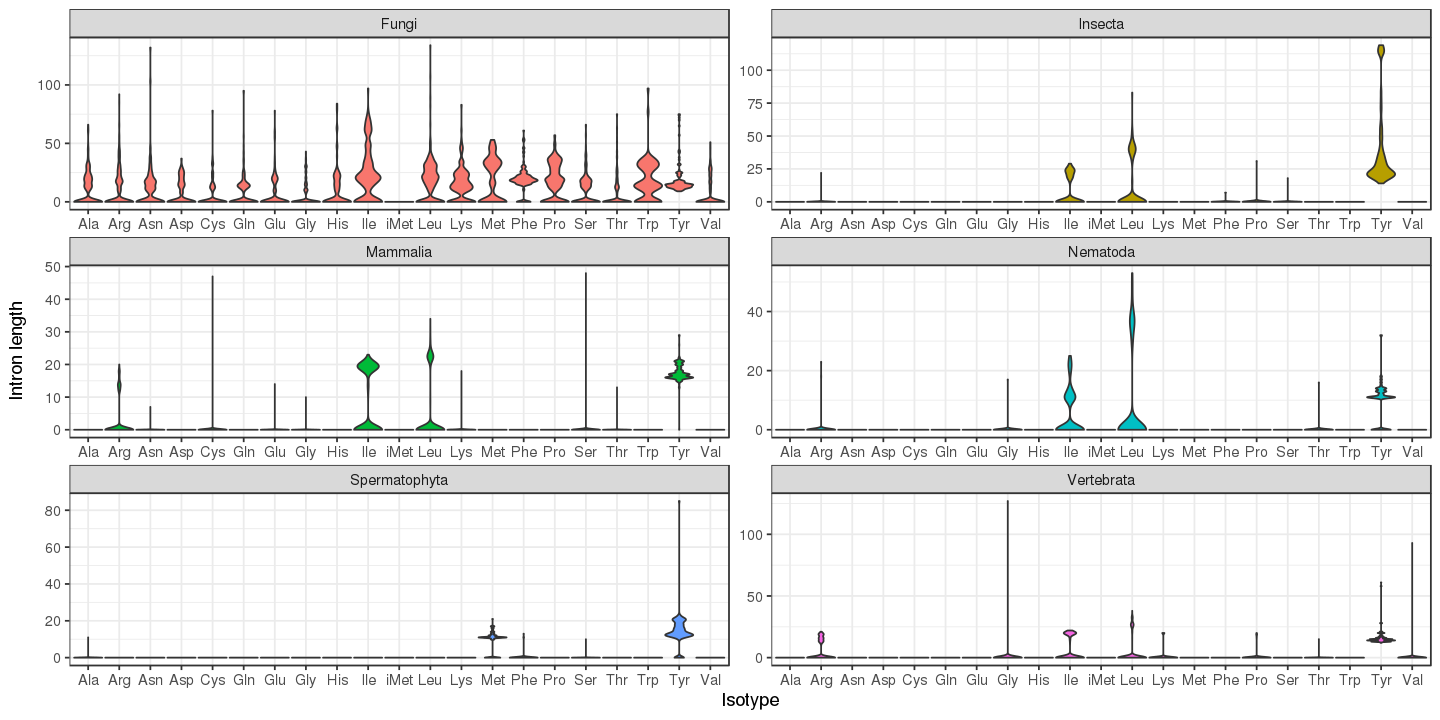

In [138]:
options(repr.plot.width=12, repr.plot.height=6)
identities %>% filter(!restrict, intron < 150) %>% select(isotype, clade, intron) %>%
  ggplot() + geom_violin(aes(x = isotype, y = intron, fill = clade), scale = 'width', adjust = 0.5) +
    facet_wrap(~ clade, ncol = 2, scales = "free") + 
    theme(legend.position = "none") + 
    labs(y = "Intron length", x = "Isotype")

## N1 and N73 identity

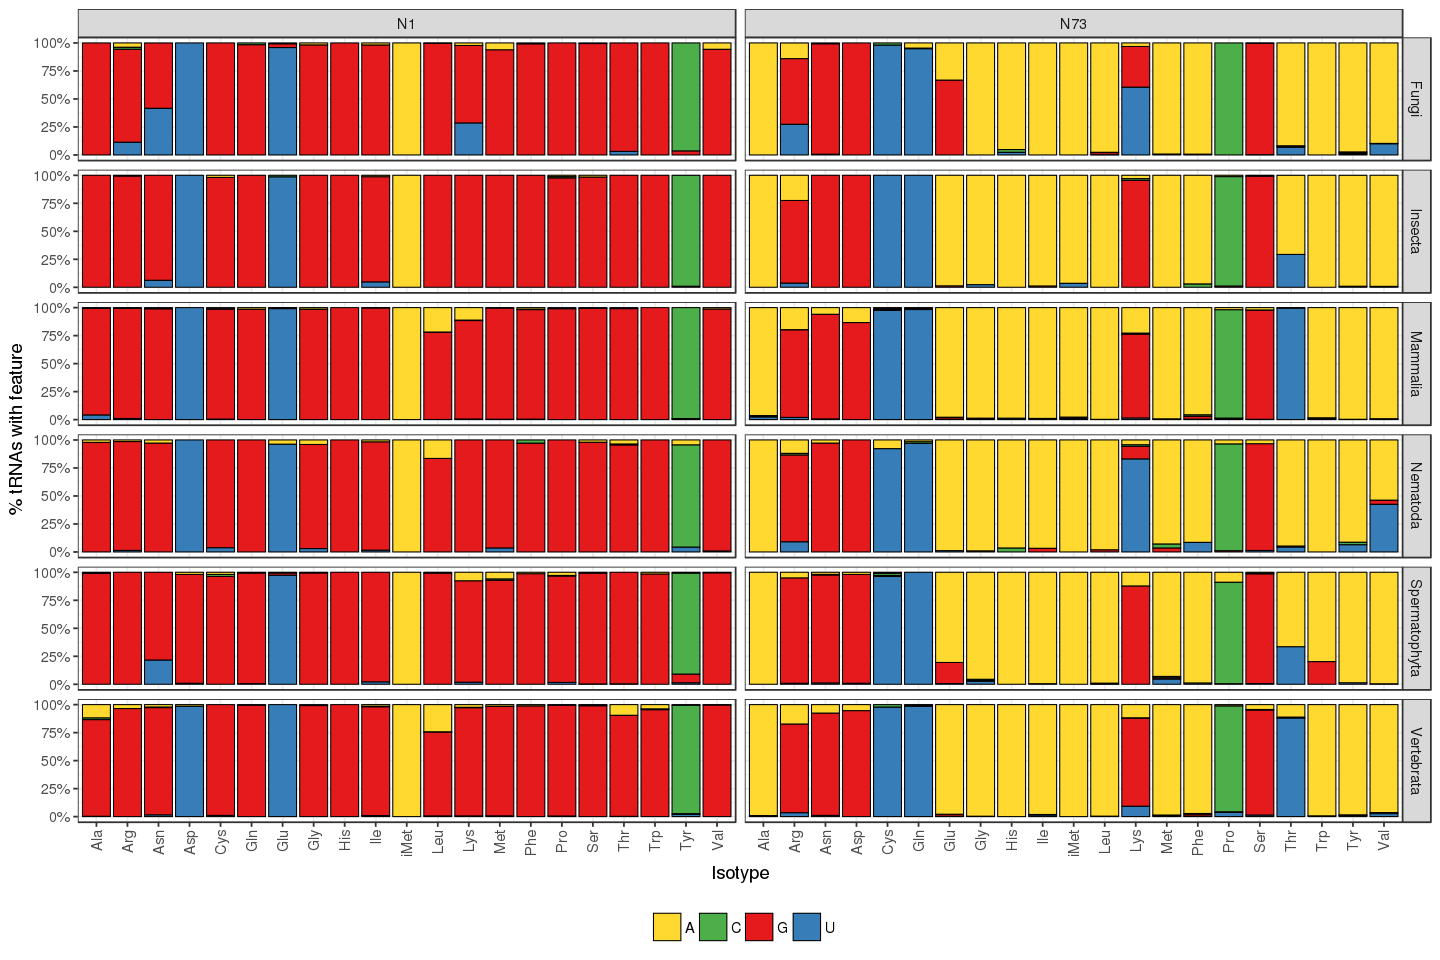

In [21]:
options(repr.plot.width=12, repr.plot.height=8)
identities %>% filter(!restrict) %>%
  select(isotype, clade, X1, X73)%>%
  gather(position, identity, X1, X73, -clade) %>%
  mutate(position = revalue(position, c('X1' = 'N1', 'X73' = 'N73'))) %>%
  filter(identity %in% c("A", "C", "G", "U")) %>%
  group_by(isotype, clade, position, identity) %>%
  summarize(count = n()) %>%
  group_by(isotype, clade, position) %>%
  mutate(freq = count/sum(count)) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = identity), size = 0.3, color = 'black', stat = 'identity') +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    scale_y_continuous(labels = percent) +
    facet_grid(clade ~ position, scales = 'free') +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position='bottom') +
    labs(fill = '', x = 'Isotype', y = '% tRNAs with feature')

## Anticodon usage

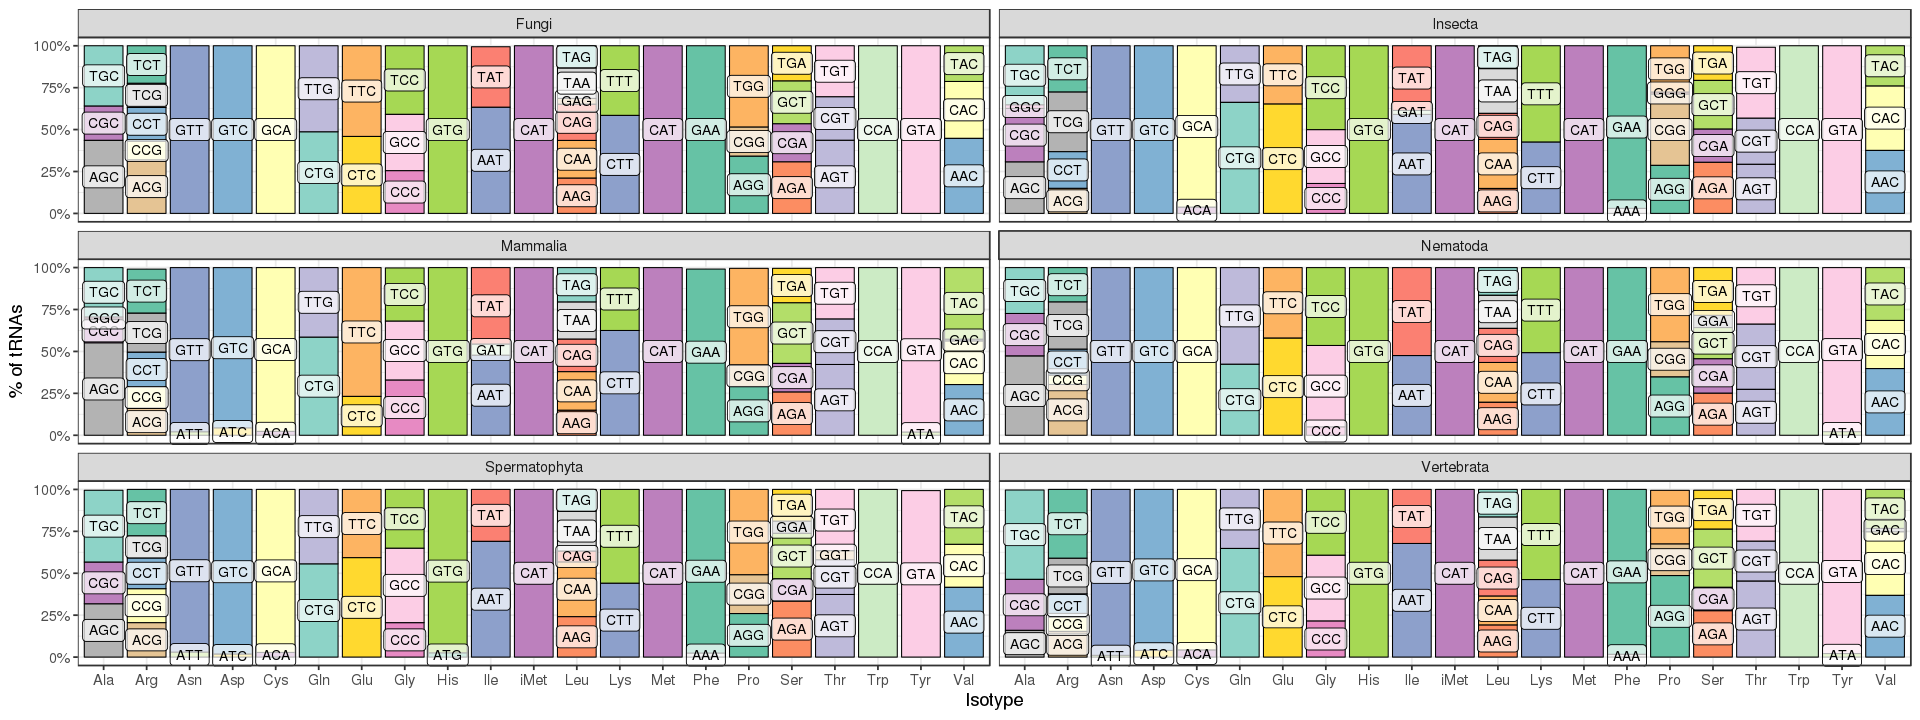

In [88]:
options(repr.plot.width=16, repr.plot.height=6)
identities %>% 
  filter(!restrict) %>%
  group_by(isotype, clade, anticodon) %>%
  summarize(count = n()) %>%
  group_by(isotype, clade) %>%
  mutate(freq = count/sum(count)) %>%
  filter(freq > 0.01) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = anticodon), color = 'black', size = 0.3, position = position_stack(reverse = TRUE), stat = 'identity') + 
    geom_label(aes(x = isotype, y = freq, label = anticodon), alpha = 0.7, position = position_stack(vjust = 0.5, reverse = FALSE), size = 3) +
    facet_wrap(~ clade, ncol = 2) +
    theme(legend.position = "none") + 
    labs(x = 'Isotype', y = '% of tRNAs') +
    scale_fill_manual(values = sample(rep(x = c(brewer.pal(8, "Set2"), brewer.pal(12, "Set3")), 4), replace = FALSE)) + 
    scale_y_continuous(labels = percent)

## 3D interactions

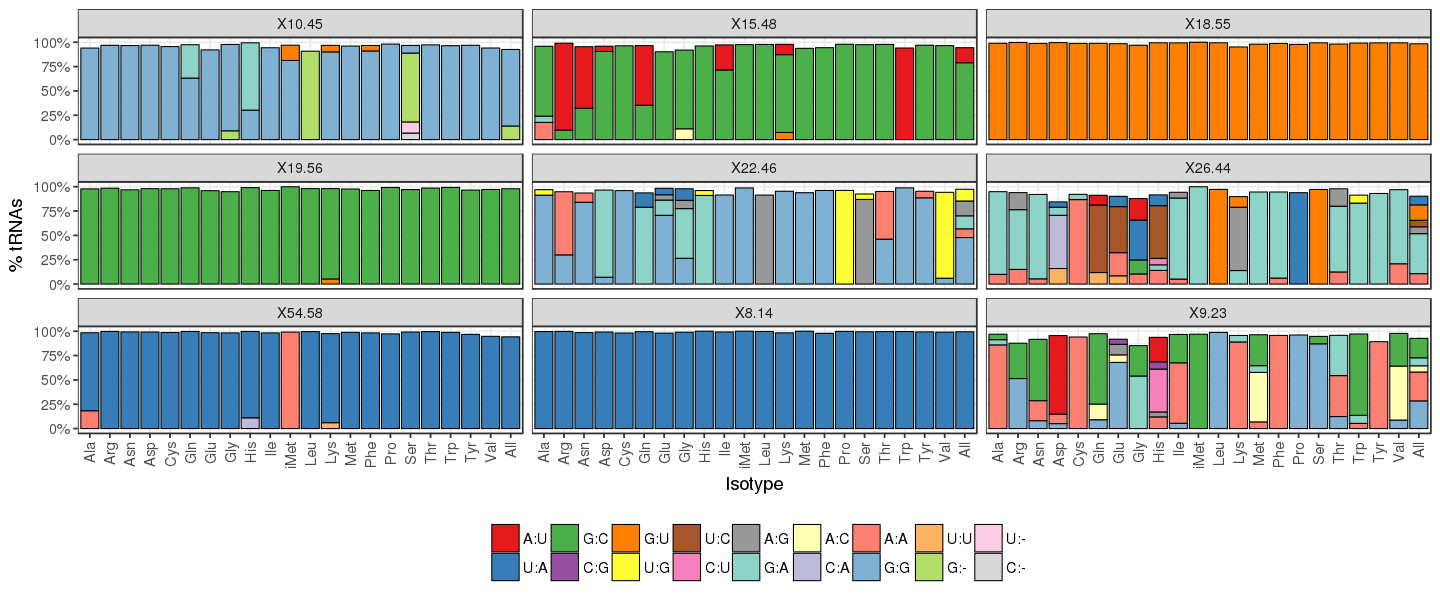

In [19]:
options(repr.plot.width=12, repr.plot.height=5)
tertiary_interactions = identities %>% filter(!restrict) %>%
  select(isotype, X8.14, X9.23, X10.45, X15.48, X18.55, X19.56, X22.46, X26.44, X54.58) %>%
  rbind(identities %>%
    select(isotype, X8.14, X9.23, X10.45, X15.48, X18.55, X19.56, X22.46, X26.44, X54.58) %>%
    mutate(isotype='All')) %>%
  gather(positions, identity, -isotype) %>%
  group_by(isotype, positions) %>%
  mutate(freq = n()) %>%
  ungroup() %>%
  group_by(isotype, positions, identity, freq) %>%
  summarize(count = n()) %>%
  mutate(freq = count/freq) %>%
  filter(freq > 0.05) %>%
  ungroup() %>%
  mutate(positions = factor(positions)) %>%
  mutate(identity = factor(identity, levels = c("A:U", "U:A", "G:C", "C:G", "G:U", "U:G", "U:C", "C:U", "A:G", "G:A", "A:C", "C:A", "A:A", "G:G", "U:U", "C:C", "G:-", "U:-", "C:-"))) %>%
  select(-count)

tertiary_interactions %>% ggplot() +
  geom_bar(aes(x = isotype, y = freq, fill = identity), color = 'black', size = 0.3, stat = 'identity') +
  facet_wrap(~ positions, nrow = 3) +
  scale_fill_manual(values = c(brewer.pal(9, "Set1"), brewer.pal(9, "Set3"))) + 
  scale_y_continuous(labels = percent_format()) +
  xlab("Isotype") + ylab("% tRNAs") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5), legend.position = 'bottom') +
  guides(fill = guide_legend(title = NULL, nrow = 2))